<a href="https://colab.research.google.com/github/Obsinaan/Autoencoders/blob/master/Copy_of_Copy_of_office31_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exprimental Alaysis Autoencoder on the Amazon data sets

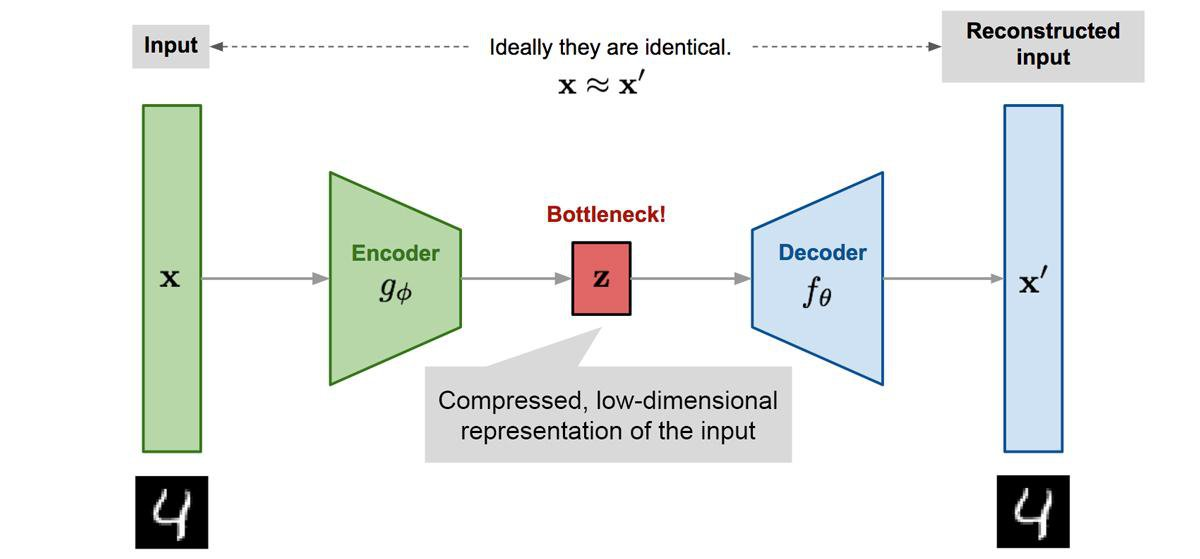

In [1]:
!wget https://transferlearningdrive.blob.core.windows.net/teamdrive/dataset/office31.zip
!unzip office31.zip

--2022-03-27 11:57:35--  https://transferlearningdrive.blob.core.windows.net/teamdrive/dataset/office31.zip
Resolving transferlearningdrive.blob.core.windows.net (transferlearningdrive.blob.core.windows.net)... 20.150.17.228
Connecting to transferlearningdrive.blob.core.windows.net (transferlearningdrive.blob.core.windows.net)|20.150.17.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79531208 (76M) [application/x-zip-compressed]
Saving to: ‘office31.zip’

office31.zip        100%[===================>]  75.85M  24.2MB/s    in 3.1s    

2022-03-27 11:57:39 (24.2 MB/s) - ‘office31.zip’ saved [79531208/79531208]

Archive:  office31.zip
   creating: office31/
   creating: office31/amazon/
   creating: office31/amazon/back_pack/
  inflating: office31/amazon/back_pack/frame_0001.jpg  
  inflating: office31/amazon/back_pack/frame_0002.jpg  
  inflating: office31/amazon/back_pack/frame_0003.jpg  
  inflating: office31/amazon/back_pack/frame_0004.jpg  
  inflating: 

In [73]:
amazon_31='/content/office31/amazon/'
dslr_31='/content/office31/dslr'
IMAGE_SHAPE = (224, 224)

In [74]:

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import DirectoryIterator
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [75]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)
train_generator = datagen.flow_from_directory(
    amazon_31,
    shuffle=True,
    target_size=IMAGE_SHAPE,
)
valid_generator = datagen.flow_from_directory(
    dslr_31,
    shuffle=False,
    target_size=IMAGE_SHAPE,
)

Found 2817 images belonging to 31 classes.
Found 498 images belonging to 31 classes.


#Build and compile the model

In [77]:
def build_model(num_classes):
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', 
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model
model = build_model(num_classes=31)

#Compile the model

In [78]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 8)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 32)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


#Training the Image Classification Model using TensorFlow

In [80]:
EPOCHS = 5
BATCH_SIZE = 32
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=valid_generator,
                    validation_steps= valid_generator.samples // BATCH_SIZE,
                    verbose=1
                    )

Epoch 1/5
88/88 [==============================] - 15s 174ms/step - loss: 2.2687 - accuracy: 0.4068 - val_loss: 3.3989 - val_accuracy: 0.0688
Epoch 2/5
88/88 [==============================] - 15s 170ms/step - loss: 2.0906 - accuracy: 0.4434 - val_loss: 3.3717 - val_accuracy: 0.0875
Epoch 3/5
88/88 [==============================] - 15s 173ms/step - loss: 1.9972 - accuracy: 0.4743 - val_loss: 3.4377 - val_accuracy: 0.0812
Epoch 4/5
88/88 [==============================] - 15s 172ms/step - loss: 1.8981 - accuracy: 0.5052 - val_loss: 3.4789 - val_accuracy: 0.0708
Epoch 5/5
88/88 [==============================] - 15s 171ms/step - loss: 1.7701 - accuracy: 0.5346 - val_loss: 3.5822 - val_accuracy: 0.0729


#The Training and Validation Loss Plots

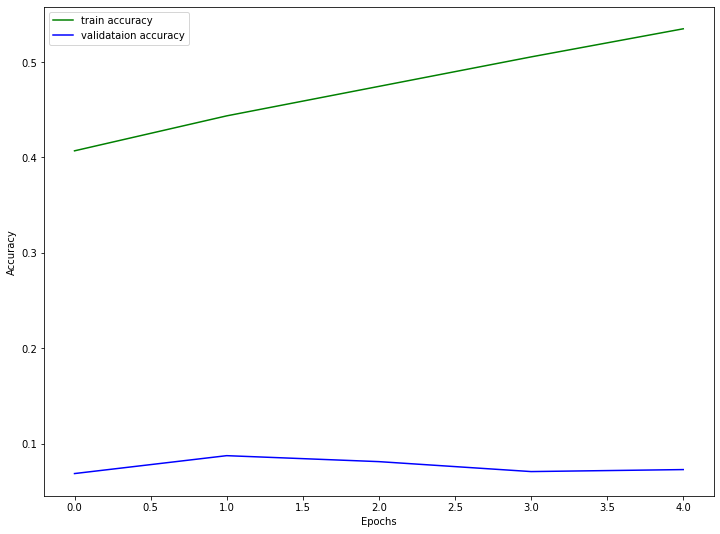

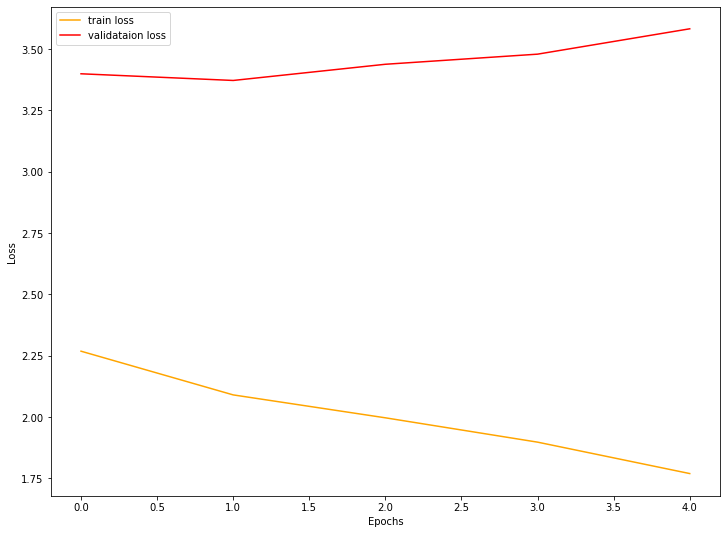

In [81]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc = history.history['val_accuracy']
def save_plots(train_acc, valid_acc, train_loss, valid_loss):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # accuracy plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_acc, color='green', linestyle='-', 
        label='train accuracy'
    )
    plt.plot(
        valid_acc, color='blue', linestyle='-', 
        label='validataion accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy.png')
    plt.show()
    # loss plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_loss, color='orange', linestyle='-', 
        label='train loss'
    )
    plt.plot(
        valid_loss, color='red', linestyle='-', 
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('loss.png')
    plt.show()
save_plots(train_acc, valid_acc, train_loss, valid_loss)

#Display sample of images

In [83]:
sample_val_images, _ = next(val_gen)

In [85]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

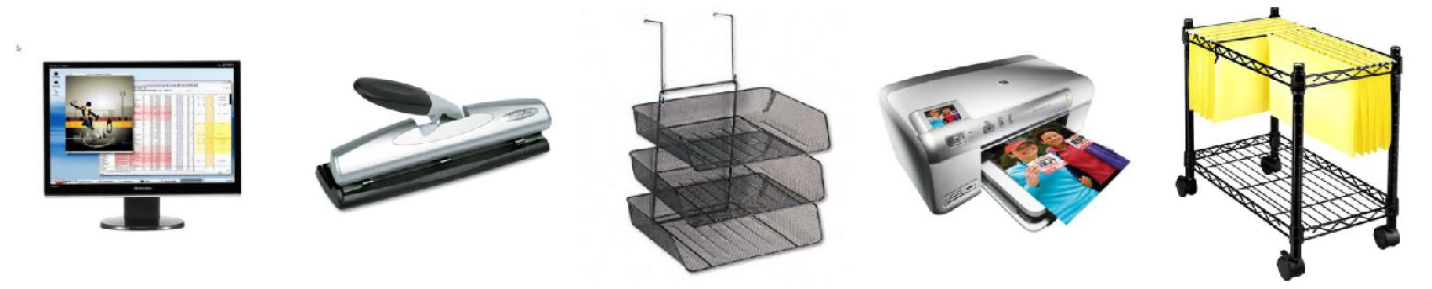

In [86]:
plotImages(sample_train_images[:5])

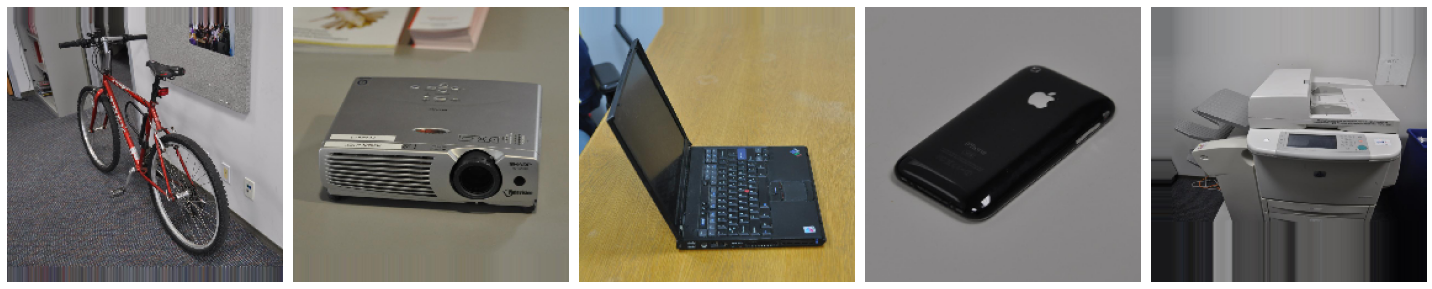

In [87]:
plotImages(sample_val_images[:5])

In [62]:
224*224*3

150528

In [63]:
input_size=150528
hidden_size=128
output_size=224

In [64]:
def build_autoencoder(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape))) # np.prod(img_shape) is the same as 32*32*3, it's more generic than saying 3072
    decoder.add(Reshape(img_shape))

    return encoder, decoder

In [72]:
 #Same as (32,32,3), we neglect the number of instances from shape
#X = train_gen.astype('float32') / 255.0 - 0.5
IMG_SHAPE = train.reshape[1:]
encoder, decoder = build_autoencoder(IMG_SHAPE, 224)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')

print(autoencoder.summary())

AttributeError: ignored

In [48]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 150528)]          0         
                                                                 
 dense_13 (Dense)            (None, 32)                4816928   
                                                                 
 dense_14 (Dense)            (None, 150528)            4967424   
                                                                 
Total params: 9,784,352
Trainable params: 9,784,352
Non-trainable params: 0
_________________________________________________________________


In [49]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [50]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [51]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [54]:
#x_train = train.reshape((len(train), np.prod(train.shape[1:])))

In [55]:
#train = np.reshape(train, (len(train), 224, 224,3))  #Reshape

In [56]:
#X_train =train_gen.reshape((len(train_gen), np.prod(train_gen.shape[1:])))

In [57]:
"""x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy')
"""


"x = Input(shape=(input_size,))\nh = Dense(hidden_size, activation='relu')(x)\nr = Dense(output_size, activation='sigmoid')(h)\n\nautoencoder = Model(inputs=x, outputs=r)\nautoencoder.compile(optimizer='adam', loss='categorical_crossentropy')\n"

In [58]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 150528)]          0         
                                                                 
 dense_13 (Dense)            (None, 32)                4816928   
                                                                 
 dense_14 (Dense)            (None, 150528)            4967424   
                                                                 
Total params: 9,784,352
Trainable params: 9,784,352
Non-trainable params: 0
_________________________________________________________________


In [59]:
autoencoder.fit_generator(train,epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


InvalidArgumentError: ignored

In [ ]:
224*224*3

In [ ]:
input_size = 224
hidden_size = 128
output_size = 224

In [ ]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

In [ ]:
autoencoder.summary()

#Train

In [ ]:
epochs = 5
batch_size = 32
history = autoencoder.fit_generator(train_gen, train_gen,epochs=5,batch_size=31)

#Pytorch

In [ ]:
import os
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import time
from torchvision import models
torch.cuda.set_device(0)

In [ ]:
data_folder = '/content/office31'
batch_size = 32
n_class = 31
domain_src, domain_tar = 'amazon', 'webcam'

In [ ]:
def load_data(root_path, domain, batch_size, phase):
    transform_dict = {
        'src': transforms.Compose(
        [transforms.RandomResizedCrop(224),
         transforms.RandomHorizontalFlip(),
         transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                              std=[0.229, 0.224, 0.225]),
         ]),
        'tar': transforms.Compose(
        [transforms.Resize(224),
         transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                              std=[0.229, 0.224, 0.225]),
         ])}
    data = datasets.ImageFolder(root=os.path.join(root_path, domain), transform=transform_dict[phase])
    data_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=phase=='src', drop_last=phase=='tar', num_workers=4)
    return data_loader

In [ ]:
src_loader = load_data(data_folder, domain_src, batch_size, phase='src')
tar_loader = load_data(data_folder, domain_tar, batch_size, phase='tar')
print(f'Source data number: {len(src_loader.dataset)}')
print(f'Target data number: {len(tar_loader.dataset)}')

#Custom class dataset

In [ ]:
def load_data(root_path, domain, batch_size, phase):
    transform_dict = {
        'src': transforms.Compose(
        [transforms.RandomResizedCrop(224),
         transforms.RandomHorizontalFlip(),
         transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                              std=[0.229, 0.224, 0.225]),
         ]),
        'tar': transforms.Compose(
        [transforms.Resize(224),
         transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                              std=[0.229, 0.224, 0.225]),
         ])}
    data = datasets.ImageFolder(root=os.path.join(root_path, domain), transform=transform_dict[phase])
    data_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=phase=='src', drop_last=phase=='tar', num_workers=4)
    return data_loader

In [ ]:
# First preprocessing of data
transform1 = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64)])

# Data augmentation and converting to tensors
random_transforms = [transforms.RandomRotation(degrees=10)]
transform2 = transforms.Compose([transforms.RandomHorizontalFlip(p=0.5),
                                 transforms.RandomApply(random_transforms, p=0.3), 
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
                                 
train_dataset = AmazonDataset(img_dir='/content/office31/amazon/',
                           transform1=transform1,
                           transform2=transform2)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=4)